In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('../data/raw/dynamic_pricing.csv')

In [27]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [28]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [29]:
df.shape

(1000, 10)

In [30]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [31]:
df['Location_Category'].value_counts()

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

In [32]:
df['Time_of_Booking'].value_counts()

Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

In [33]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


<Axes: >

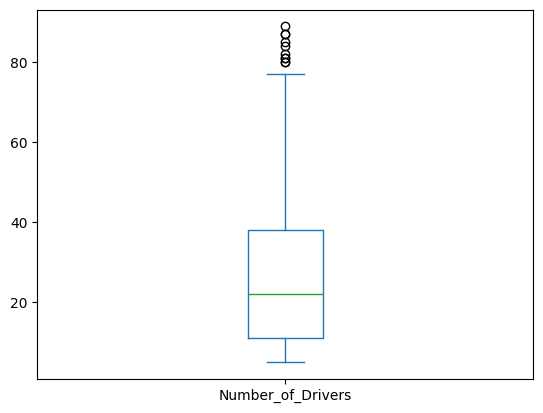

In [34]:
df['Number_of_Drivers'].plot(kind='box')

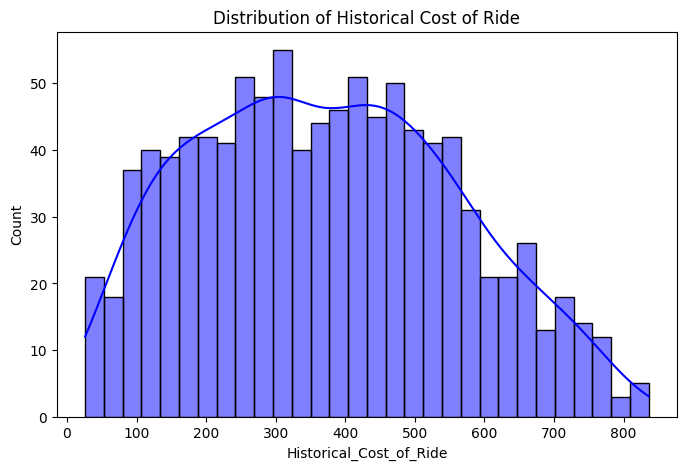

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Historical_Cost_of_Ride'], bins=30, kde=True, color='blue')
plt.title('Distribution of Historical Cost of Ride')
plt.show()

In [36]:
df['Customer_Loyalty_Status'].value_counts()

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

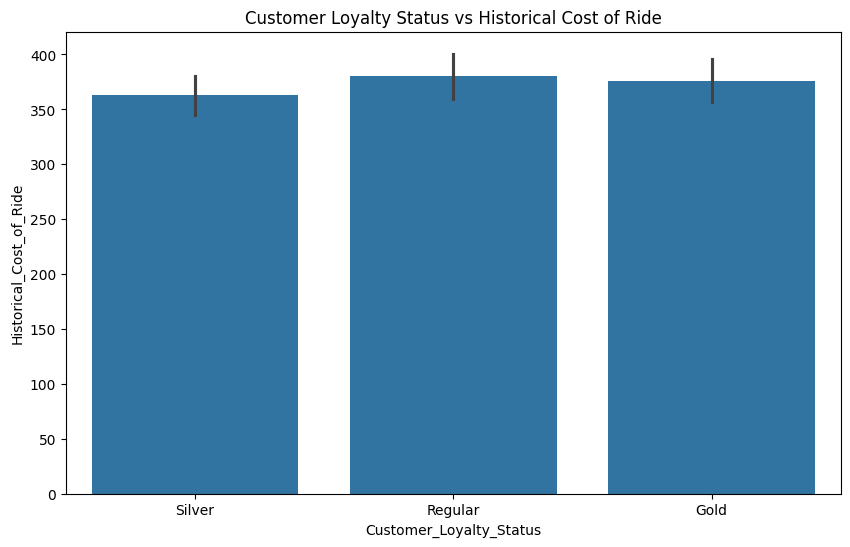

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=df)
plt.title('Customer Loyalty Status vs Historical Cost of Ride')
plt.show()

In [38]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [39]:
df['Location_Category'].value_counts()

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

In [40]:

df_cost_by_location=df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().reset_index()
df_cost_by_location

,Location_Category,Historical_Cost_of_Ride
0,Rural,379.942172
1,Suburban,374.319486
2,Urban,363.673259


/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_24330/3893782781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cost_by_location, x='Location_Category', y='Historical_Cost_of_Ride', palette='viridis')


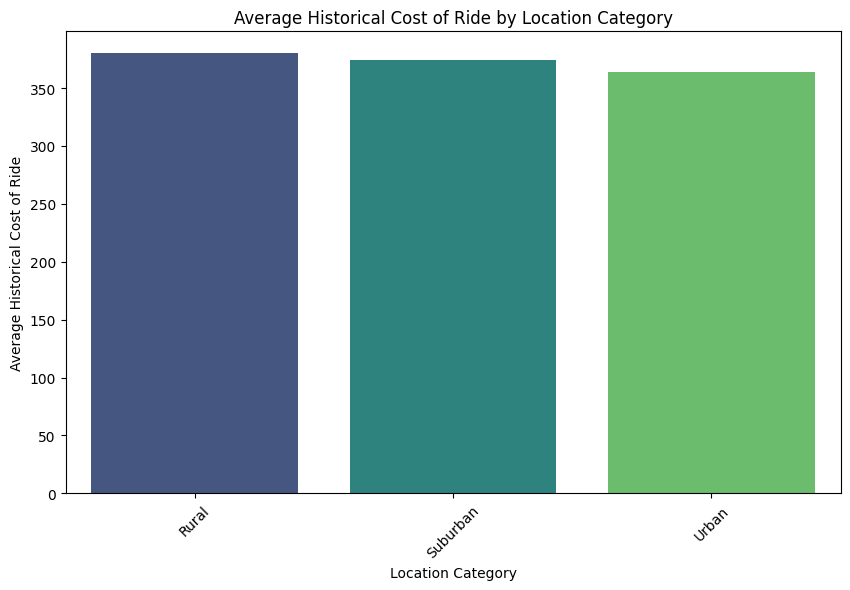

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cost_by_location, x='Location_Category', y='Historical_Cost_of_Ride', palette='viridis')
plt.title('Average Historical Cost of Ride by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Average Historical Cost of Ride')
plt.xticks(rotation=45)
plt.show()


In [42]:
df_price_by_time_of_booking= df.groupby('Time_of_Booking')['Historical_Cost_of_Ride'].mean().reset_index()
df_price_by_time_of_booking

,Time_of_Booking,Historical_Cost_of_Ride
0,Afternoon,380.818228
1,Evening,364.253957
2,Morning,378.062094
3,Night,367.009354


/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_24330/1513463502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_by_time_of_booking, x='Time_of_Booking', y='Historical_Cost_of_Ride', palette='viridis')


Text(0.5, 1.0, 'Price vs Time of booking')

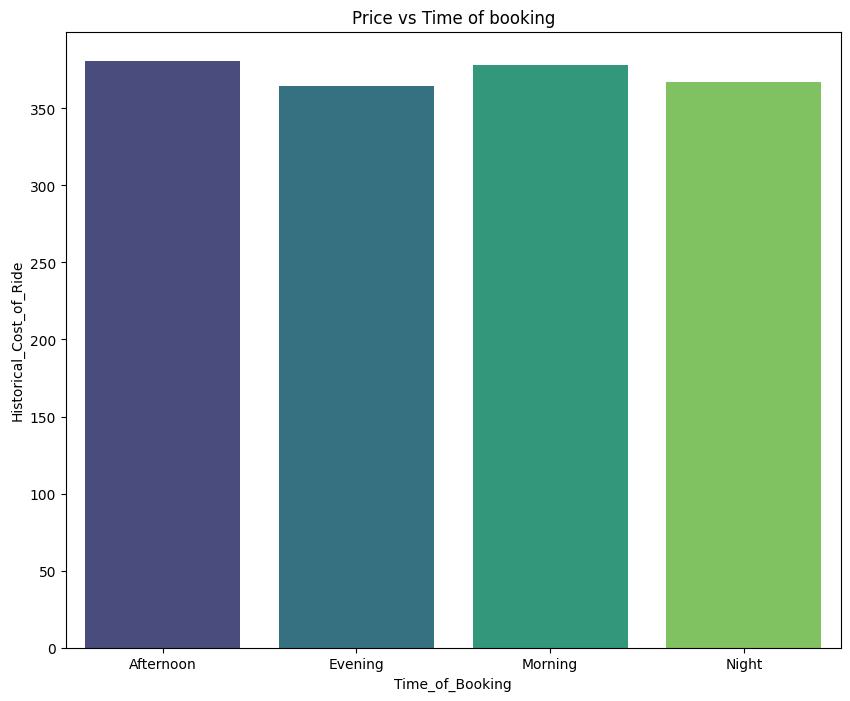

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_price_by_time_of_booking, x='Time_of_Booking', y='Historical_Cost_of_Ride', palette='viridis')
plt.title("Price vs Time of booking")

In [44]:
df_price_by_customer_loyalty= df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean().reset_index()
df_price_by_customer_loyalty

,Customer_Loyalty_Status,Historical_Cost_of_Ride
0,Gold,376.118746
1,Regular,380.125251
2,Silver,362.772140


/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_24330/516707769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_by_customer_loyalty, x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', palette='viridis')


Text(0.5, 1.0, 'Price vs Time of booking')

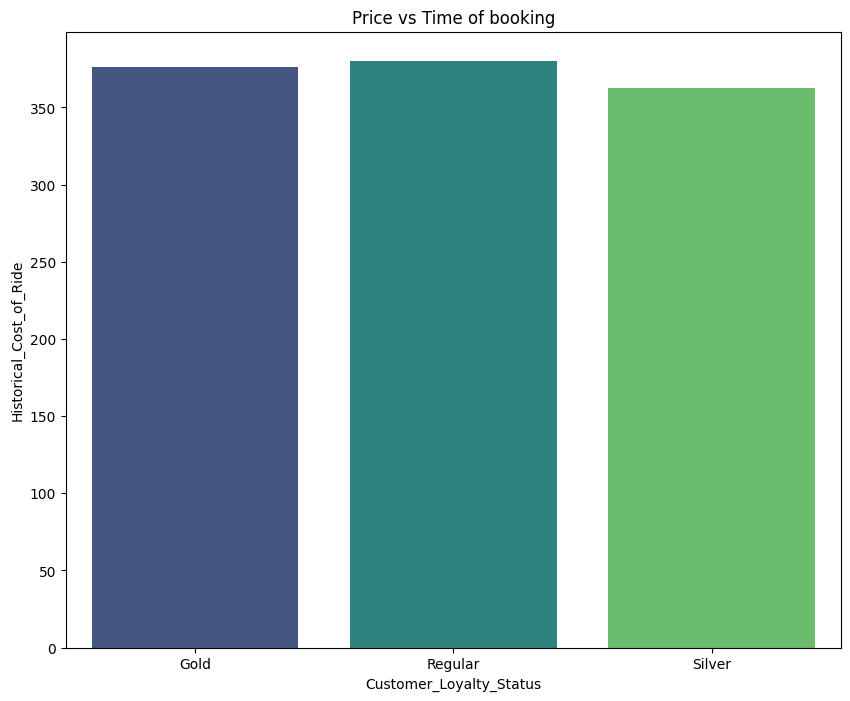

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_price_by_customer_loyalty, x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', palette='viridis')
plt.title("Price vs Time of booking")

In [46]:
df['Expected_Ride_Duration'].value_counts()

Expected_Ride_Duration
147    12
45     12
130    10
32     10
162     9
       ..
104     1
54      1
59      1
27      1
17      1
Name: count, Length: 171, dtype: int64

In [47]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [49]:
df.groupby(['Customer_Loyalty_Status', 'Vehicle_Type'])['Historical_Cost_of_Ride'].mean().reset_index()

,Customer_Loyalty_Status,Vehicle_Type,Historical_Cost_of_Ride
0,Gold,Economy,349.783482
1,Gold,Premium,401.301843
2,Regular,Economy,377.152345
3,Regular,Premium,382.557628
4,Silver,Economy,319.531903
5,Silver,Premium,404.850006


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_cost_by_loyalty_and_vehicle, 
            x='Customer_Loyalty_Status', 
            y='Historical_Cost_of_Ride', 
            hue='Vehicle_Type', 
            palette='viridis')

plt.title('Average Historical Cost of Ride by Customer Loyalty Status and Vehicle Type')
plt.xlabel('Customer Loyalty Status')
plt.ylabel('Average Historical Cost of Ride')
plt.xticks(rotation=45)  
plt.legend(title='Vehicle Type') 
plt.show()


In [50]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [52]:
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [53]:
df2=pd.get_dummies(df,columns=['Location_Category', 'Time_of_Booking', 'Vehicle_Type'], drop_first=True)

In [63]:
df2.head(10)

,Number_of_Riders,Number_of_Drivers,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,2,13,4.47,90,284.257273,False,True,False,False,True,True
1,58,39,2,72,4.06,43,173.874753,True,False,True,False,False,False
2,42,31,2,0,3.99,76,329.795469,False,False,False,False,False,True
3,89,28,1,67,4.31,134,470.201232,False,False,False,False,False,True
4,78,22,1,74,3.77,149,579.681422,False,False,False,False,False,False
5,59,35,2,83,3.51,128,339.955361,False,True,False,False,True,False
6,93,43,1,44,4.41,16,104.061541,True,False,False,False,False,True
7,62,39,0,83,3.59,47,235.811864,False,False,False,False,False,True
8,79,14,2,71,3.74,128,501.412517,False,False,True,False,False,False
9,42,6,2,21,3.85,128,398.993365,False,False,False,False,True,True


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()
df2['Customer_Loyalty_Status']=le.fit_transform(df2['Customer_Loyalty_Status'])

In [62]:
df2.head(10)

,Number_of_Riders,Number_of_Drivers,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,2,13,4.47,90,284.257273,False,True,False,False,True,True
1,58,39,2,72,4.06,43,173.874753,True,False,True,False,False,False
2,42,31,2,0,3.99,76,329.795469,False,False,False,False,False,True
3,89,28,1,67,4.31,134,470.201232,False,False,False,False,False,True
4,78,22,1,74,3.77,149,579.681422,False,False,False,False,False,False
5,59,35,2,83,3.51,128,339.955361,False,True,False,False,True,False
6,93,43,1,44,4.41,16,104.061541,True,False,False,False,False,True
7,62,39,0,83,3.59,47,235.811864,False,False,False,False,False,True
8,79,14,2,71,3.74,128,501.412517,False,False,True,False,False,False
9,42,6,2,21,3.85,128,398.993365,False,False,False,False,True,True


In [64]:
X=df2.drop('Historical_Cost_of_Ride', axis=1)
y=df2['Historical_Cost_of_Ride']

In [67]:
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_classif for classification tasks

selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

feature_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score']).sort_values(by='Score', ascending=False)
print(feature_scores)

                                  Score
Expected_Ride_Duration      6148.119102
Vehicle_Type_Premium          17.872690
Number_of_Past_Rides           1.284924
Location_Category_Urban        1.177644
Customer_Loyalty_Status        0.932493
Time_of_Booking_Evening        0.583246
Time_of_Booking_Night          0.328186
Number_of_Drivers              0.291286
Time_of_Booking_Morning        0.287674
Location_Category_Suburban     0.044713
Number_of_Riders               0.033872
Average_Ratings                0.001128


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

In [74]:
print(mse)
print(r2)

5397.24134207576
0.8519714074000422


In [93]:

df_results1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_results1.head(3)


,Actual,Predicted
521,470.269024,389.812250
737,286.409294,323.501741
740,552.269375,660.083113


In [75]:
# Function to predict new prices based on input features
def predict_price(input_data):
    # Scale the input data using the same scaler
    input_scaled = scaler.transform(input_data)
    return model.predict(input_scaled)

# Example input for prediction
new_data = pd.DataFrame({
    'Number_of_Riders': [60],
    'Number_of_Drivers': [30],
    'Location_Category': [1],  # Replace with encoded value
    'Customer_Loyalty_Status': [0],  # Replace with encoded value
    'Number_of_Past_Rides': [10],
    'Average_Ratings': [4.5],
    'Time_of_Booking': [1],  # Replace with encoded value for Night
    'Vehicle_Type': [0],  # Replace with encoded value
    'Expected_Ride_Duration': [45],
    'Late_Night': [1]  # Assuming it's a late-night ride
})

# Predicting the price
predicted_price = predict_price(new_data)
print(f'Predicted Price for the ride: {predicted_price[0]:.2f}')


NameError: name 'scaler' is not defined

In [80]:
df2.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Customer_Loyalty_Status',
       'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride', 'Location_Category_Suburban',
       'Location_Category_Urban', 'Time_of_Booking_Evening',
       'Time_of_Booking_Morning', 'Time_of_Booking_Night',
       'Vehicle_Type_Premium'],
      dtype='object')

In [81]:
df2['Time_of_Booking_Night'].value_counts()

Time_of_Booking_Night
False    724
True     276
Name: count, dtype: int64

In [94]:
def dynamic_pricing(row):
    base_price = row['Predicted']

    if row['Time_of_Booking_Night'] == 1:
        surge_multiplier = 1.5  # Example: 1.5x price increase for night rides
    else:
        surge_multiplier = 1.0  # No price increase for other times

    # Supply-demand based surge multiplier (if riders > drivers)
    if row['Number_of_Riders'] > row['Number_of_Drivers']:
        demand_supply_multiplier = 1 + (row['Number_of_Riders'] - row['Number_of_Drivers']) / row['Number_of_Drivers']
    else:
        demand_supply_multiplier = 1.0

    # Final dynamic price
    dynamic_price = base_price * surge_multiplier * demand_supply_multiplier
    return dynamic_price

In [95]:
df_results1['Number_of_Riders'] = X_test['Number_of_Riders'].values
df_results1['Number_of_Drivers'] = X_test['Number_of_Drivers'].values
df_results1 = pd.concat([df_results1, X_test[['Time_of_Booking_Night']].reset_index(drop=True)], axis=1)

df_results1['Dynamic_Price'] = df_results1.apply(dynamic_pricing, axis=1)



In [97]:
print(df_results1.head(3))

         Actual   Predicted  Number_of_Riders  Number_of_Drivers  \
521  470.269024  389.812250              38.0                8.0   
737  286.409294  323.501741              83.0               18.0   
740  552.269375  660.083113              22.0                7.0   

    Time_of_Booking_Night  Dynamic_Price  
521                   NaN    1851.608187  
737                   NaN    1491.702472  
740                   NaN    2074.546927  


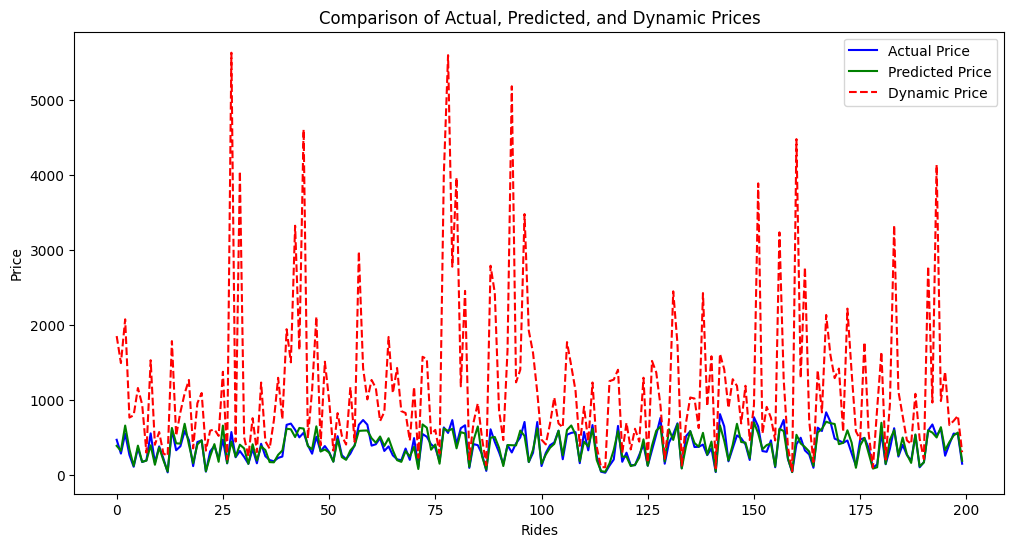

In [98]:
plt.figure(figsize=(12,6))
plt.plot(df_results['Actual'].values, label='Actual Price', color='blue')
plt.plot(df_results['Predicted'].values, label='Predicted Price', color='green')
plt.plot(df_results['Dynamic_Price'].values, label='Dynamic Price', color='red', linestyle='--')
plt.title('Comparison of Actual, Predicted, and Dynamic Prices')
plt.xlabel('Rides')
plt.ylabel('Price')
plt.legend()
plt.show()